In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment import TicTacToeEnv as ttte

## Some Quick Calculations

In a Tic Tac Toe game, there are $3^9$ possible combinations of <strong>X</strong>, <strong>O</strong> and <em>empty</em> in 9 cells.

We are getting only one observation from the environment, that is, the positioning of the X, O and empty in the matrix. We will use the `board_hash` property of the board to calculate an unique hash for every combination on the game. We need to somehow convert the hash to the `row number` of the Q-Table.

The Q-Table will have $3^9$ rows for every possible observation space. For each row, there will be $9$ columns indicating the 9 possible actions the `Agent` can take.

In [2]:
# Initializing the Q-Table with random values from an uniform distribution
q_table = np.random.uniform(size=(3**9, 9))
print(q_table.shape)
print(q_table)

(19683, 9)
[[0.70018506 0.85912317 0.70268718 ... 0.84044049 0.38423366 0.8112779 ]
 [0.08501346 0.37203118 0.30246698 ... 0.80961069 0.06376705 0.37184279]
 [0.82469343 0.03846706 0.65581464 ... 0.94192086 0.54862916 0.84514591]
 ...
 [0.40547959 0.11663646 0.32478287 ... 0.96319692 0.02844316 0.95852852]
 [0.99907922 0.1581403  0.876827   ... 0.97414974 0.8851637  0.59590757]
 [0.57679946 0.54619968 0.6156397  ... 0.53216428 0.76473044 0.7074726 ]]


In [3]:
# Hash to Row Number Mapping
mapping = {}
last_map = 0
def get_row_number(board_hash):
    global mapping, last_map
    if board_hash not in mapping.keys():
        mapping[board_hash] = last_map
        last_map += 1
    return mapping[board_hash]

In [4]:
# Action number to proper action array
def proper_action(action_number):
    return np.array([action_number//3, action_number%3])

In [5]:
# For matplotlib to render an episode
def render_episode(game_state_images, game_state_rewards, title):
    plt.subplots(figsize=(12,12))
    for i in range(len(game_state_images)):
        plt.subplot(1,len(game_state_images),i+1)
        plt.title("St %d"%i)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(game_state_images[i])
        plt.xlabel(game_state_rewards[i])
    plt.suptitle(title)
    plt.subplots_adjust(top=1.5)
    plt.show()

## Q-Learning Algorithm

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/47fa1e5cf8cf75996a777c11c7b9445dc96d4637">

#### Initializing Environment

In [6]:
env = ttte()

#### Setting up hyperparameters

In [7]:
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
EPISODES = 1000000
SHOW_EVERY = 100000

epsilon = 0.5
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2

epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

#### Actual Q-Table Learning

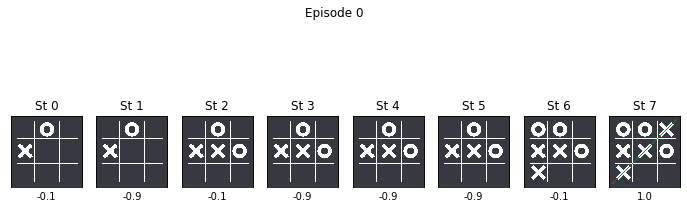

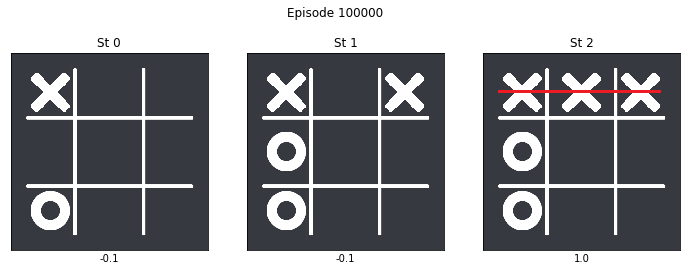

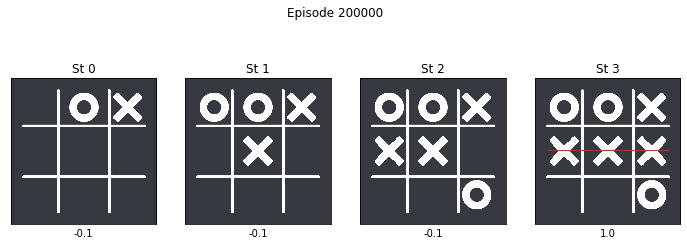

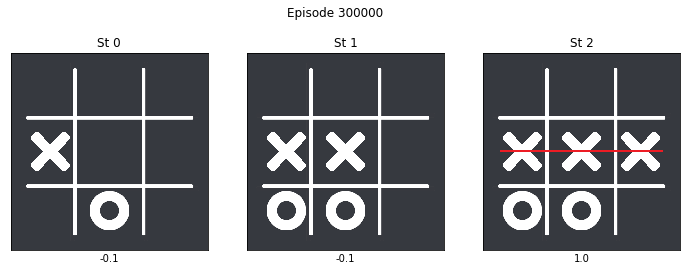

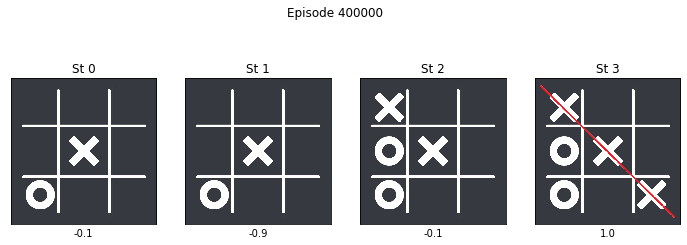

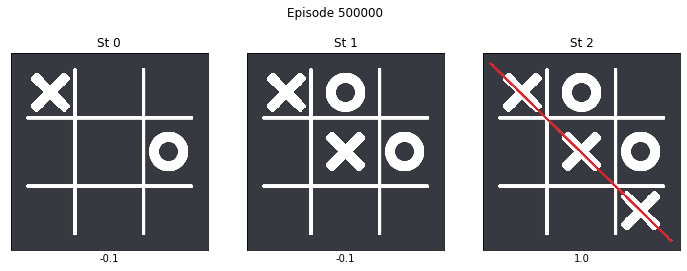

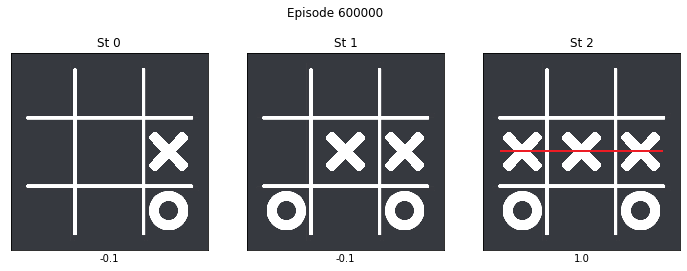

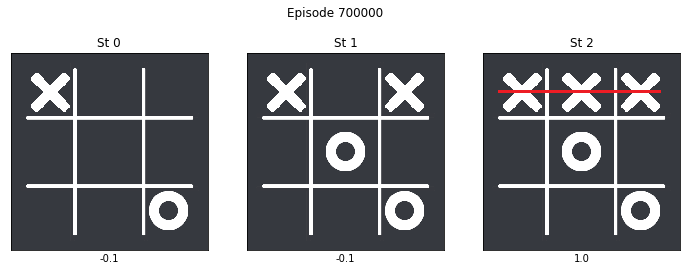

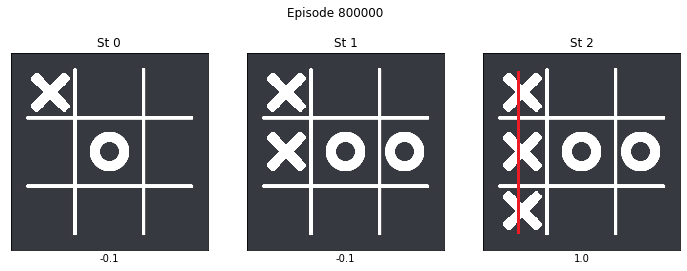

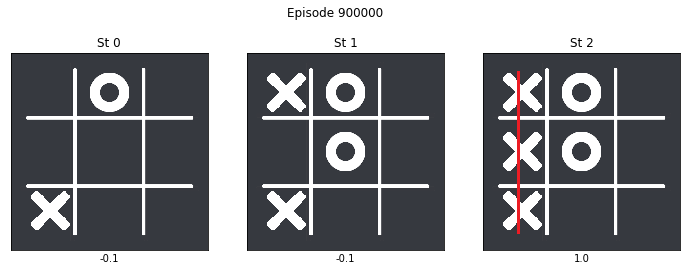

We made it in 966434 out of 1000000


In [8]:
EPISODES_WON = 0

for ep in range(EPISODES):
    
    if ep%SHOW_EVERY == 0:
        game_state_images = []
        game_state_rewards = []

    env.reset()
    state = get_row_number(env.state_hash)
    done = False
    
    while not done:
        
        if np.random.random() > epsilon:
            action_num = np.argmax(q_table[state])
        else:
            action_num = np.random.randint(0, 9)
        
        _, reward, done = env.step(proper_action(action_num))
        new_state = get_row_number(env.state_hash)

        max_future_q = np.max(q_table[new_state])
        current_q = q_table[state, action_num]

        new_q = (1-LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT_FACTOR * max_future_q)
        q_table[state, action_num] = new_q

        # Wins
        if reward == 1.0:
            EPISODES_WON += 1
            q_table[state, action_num] = reward
    
        if ep%SHOW_EVERY == 0:
            game_state_images.append(env.render_image)
            game_state_rewards.append(reward)

        state = new_state
    
    if START_EPSILON_DECAYING <= ep <= END_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value        
    
    if ep%SHOW_EVERY == 0:
        render_episode(game_state_images, game_state_rewards, "Episode %d"%ep)

print(f"We made it in {EPISODES_WON} out of {EPISODES}")

In [9]:
len(mapping)

3381

In [10]:
q_table = q_table[:len(mapping)]
q_table.shape

(3381, 9)

Although there are $3^9$ possible states, only $3381$ states are learnt although there were so many episodes. This is something weird and I believe that is because the Q-Agent only gives chance in <strong>X</strong>. If we train both <strong>X</strong> as well as <strong>O</strong>, then we must have many more positions. Also, the `epsilon` handling of random action should have been from that current action space instead of just randomly picking a value.

We will deal with all of these in the next notebook. Saving for future reference.

In [11]:
import pickle

with open("q_table_X_only.pkl", "wb") as handle:
    pickle.dump(q_table, handle)

with open("mapping_X_only.pkl", "wb") as handle:
    pickle.dump(mapping, handle)